## *Задача 1* 


Реализовать генератор матрциц, который должен поддерживать функции:
* Генерация абсолютно случайной матрицы $n\times m$
* Генерация случайной диагональной матрицы $n\times n$
* Генерация случайной верхнетреугольной матрицы
* Генерация случайной нижнетреугольной матрицы
* Генерация симметричной матрицы
* Генерация вырожденной матрицы
* Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$

Оценить вероятность того, что созданная матрица будет вырожденной. 

Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).


In [19]:
import numpy as np

In [91]:
class Generator:
    
    def __init__(self, n, m, integer=False, maximum=10):
        self.n = n
        self.m = m
        self.integer = integer
        self.maximum = maximum
        
    # fix if you need another distribution of values    
    def bake_shape(self, k, l, maximum=0):
        if maximum == 0 :
            maximum = self.maximum
        if self.integer:
            return np.int_(np.round(maximum * np.random.rand(k, l)))
        else:
            return maximum * np.random.rand(k, l)
        
    def full_random(self):
        return self.bake_shape(self.n, self.m)
    
    def diagonal(self):
        return np.int_(np.eye(self.n)) * self.bake_shape(self.n, self.n)
    
    def upper_triangular(self):
        return np.int_(np.triu(np.ones((self.n, self.m)), 0))*self.bake_shape(self.n, self.m)
    
    def lower_triangular(self):
        return np.int_(np.tril(np.ones((self.n, self.m)), 0))*self.bake_shape(self.n, self.m)
    
    def symmetrical(self):
        matr = self.bake_shape(self.n, self.n, maximum=self.maximum/2)
        return matr + matr.T
    
    def degenerate(self):
        matr = self.bake_shape(self.n, self.n)
        new_line = np.zeros(self.n)
        for i in range(1, self.n):
            new_line = new_line + matr[i]
        matr[0] = new_line
        return matr
    
    def ladder(self):
        matr = np.int_(np.triu(np.ones(self.n)))
        matr[self.m : , :] = 0
        return matr * self.bake_shape(self.n, self.n)
    
    def perturbation(self, eps):
        return 2*eps*np.random.rand(self.n, self.m) - eps
        
gen = Generator(4, 3, integer=True, maximum=100)
print(gen.full_random())
print(gen.diagonal())
print(gen.upper_triangular())
print(gen.lower_triangular())
print(gen.symmetrical())
print(gen.degenerate())
print(np.linalg.det(gen.degenerate()))
print(gen.ladder())
print(gen.perturbation(0.2))

[[ 38  97  33]
 [ 37 100  32]
 [ 44   2  95]
 [ 52  55  97]]
[[29  0  0  0]
 [ 0 69  0  0]
 [ 0  0 90  0]
 [ 0  0  0 62]]
[[62 96 21]
 [ 0 15 24]
 [ 0  0 60]
 [ 0  0  0]]
[[56  0  0]
 [54 78  0]
 [62  4 94]
 [38 95 53]]
[[36 26 79 26]
 [26 34 38 58]
 [79 38 58 94]
 [26 58 94 52]]
[[279 129 181 110]
 [ 91  79  67  83]
 [ 90  43  38  26]
 [ 98   7  76   1]]
0.0
[[33 81 91  1]
 [ 0 17 46 49]
 [ 0  0 42 60]
 [ 0  0  0  0]]
[[-0.16328001 -0.06970783  0.07549712]
 [ 0.1556351   0.114755   -0.01226585]
 [ 0.03147749  0.02297097  0.05920522]
 [-0.09211186  0.07410814  0.05353784]]


Верхне-нижнетреугольные матрицы, а также случайная, диагональная и симметричная -- почти всегда невырождены, т.к. вырожденные матрица занимают в их пространствах множество меры нуль в силу того, что задаются как минимум одним уравнением на коэффициенты.
Вырожденная и ступенчатая с рангом ниже n матрицы генерируется вырожденной с веротяностью 1

Норма матрицы возмущений не больше нормы матрицы целиком состоящей из эпсилон. Для нее всякая порожденная вектором норма не превзойдет наибольшего собственного числа, которое равно $n\varepsilon$

# Задача 2


Используя ряд Маклорена, реализовать вычисление основных элементарных функций: 
* Экспонента
* Натуральный логарифм
* Синус
* Косинус
* Тангенс
* Котангенс
* Арксинус
* Арккосинус
* Арктангенс
* Гиперболический синус 
* Гиперболический косинус
* Гиперболический тангенс
* Гиперболический арктангенс

Оценить величину машинного эпсилон. Предложить модификации для некоторых функций и сравнить полученные результаты.

In [22]:
def my_exp(x):
    summ = 1
    term = x
    k = 2
    while(summ != summ + term):
        summ += term
        term *= x/k
        k += 1
    return summ

pts = {5, 2, 1, 0, -1, -2, -5, -100}
for pt in pts:
    print("exp({}) = {}, delta = {}".format(pt, my_exp(pt), (np.exp(pt)-my_exp(pt))/np.exp(pt)))

exp(0) = 1, delta = 0.0
exp(1) = 2.7182818284590455, delta = -1.6337129034990842e-16
exp(2) = 7.389056098930649, delta = 2.4040375598952704e-16
exp(5) = 148.4131591025766, delta = 0.0
exp(-1) = 0.36787944117144245, delta = -3.017899073375402e-16
exp(-5) = 0.006737946999084638, delta = 1.2306386821229965e-13
exp(-100) = 8.144652745098073e+25, delta = -2.1893780658237973e+69
exp(-2) = 0.13533528323661273, delta = -2.0508750528199364e-16


Для -100 уже все плохо, окей, для отрицательных сделаем как 1/положительного

In [23]:
def my_exp_v2(x):
    if x >= 0:
        return my_exp(x)
    else:
        return 1/my_exp(-x)
    
pts = {5, 2, 1, 0, -1, -2, -5, -100}
for pt in pts:
    print("exp({}) = {}, delta = {}".format(pt, my_exp_v2(pt), (np.exp(pt)-my_exp_v2(pt))/np.exp(pt)))

exp(0) = 1, delta = 0.0
exp(1) = 2.7182818284590455, delta = -1.6337129034990842e-16
exp(2) = 7.389056098930649, delta = 2.4040375598952704e-16
exp(5) = 148.4131591025766, delta = 0.0
exp(-1) = 0.3678794411714423, delta = 1.508949536687701e-16
exp(-5) = 0.006737946999085467, delta = 0.0
exp(-100) = 3.7200759760208336e-44, delta = 6.691277616880895e-16
exp(-2) = 0.13533528323661273, delta = -2.0508750528199364e-16


Машинное эпсилон таким образом 10^-16

In [24]:
# Это в основном расходится
def my_ln(x):
    y = x - 1
    summ = 0
    term = y
    k = 2
    while(summ != summ + term):
        summ += term
        term *= y*(k-1)/k
        k += 1
    return summ

# idea: x= (1+y)/(1-y)
def my_ln_v2(x):
    y = (x-1) / (x+1)
    return my_ln(1+y) - my_ln(1-y)

pts = {0.1, 0.5, 0.9, 1., 1.1, 0.998, 1.5, 5, 100}
for pt in pts:
    print("ln({}) = {}, delta = {}".format(pt, my_ln_v2(pt), (np.log(pt)-my_ln_v2(pt))/np.log(pt)))

ln(0.1) = -2.302585092994044, delta = 5.785964799319723e-16
ln(0.5) = -0.693147180559945, delta = 4.805139755722377e-16
ln(0.9) = -0.10536051565782617, delta = 1.053737273107858e-15
ln(1.1) = 0.09531017980432496, delta = -2.912131282577796e-16
ln(1.0) = 0, delta = nan
ln(0.998) = -0.0020020026706731434, delta = -3.206028121309286e-14
ln(1.5) = 0.40546510810816433, delta = 1.369073444821529e-16
ln(5) = 1.609437912434099, delta = 8.277844204224551e-16
ln(100) = 4.6051701859880785, delta = 2.8929823996598612e-15


C:\Users\dedko\AppData\Local\Temp/ipykernel_10268/2719486859.py:20: RuntimeWarning: invalid value encountered in double_scalars
  print("ln({}) = {}, delta = {}".format(pt, my_ln_v2(pt), (np.log(pt)-my_ln_v2(pt))/np.log(pt)))


In [25]:
# Долго сходится
def my_sin(x):
    summ = x
    term = -x**3/6
    k = 5
    while summ != summ + term:
        summ += term 
        term *= -1*x**2/k
        k += 2
    return summ    

def my_cos(x):
    summ = 1
    term = -x**2/2
    k = 4
    while summ != summ + term:
        summ += term 
        term *= -1*x**2/k
        k += 2
    return summ  

# Воспользуемся периодичностью и тригонометрией
import math
def my_sin_v2(x):
    n = 0
    if(x < 0):
        n = 1
        x = -x
        
    while x > math.pi:
        n += 1
        x -= math.pi
    if x > math.pi/2:
        x = math.pi - x
        
    # sin(8*alpha) or cos(8*alpha)       
    if(x <= math.pi/4):
        s = my_sin(x/8)
        c = my_cos(x/8)
        return (-1)**n*(8*s*c*(1-2*s**2)*(1-8*s**2*c**2))
    else:
        s = my_sin((math.pi/2-x)/8)
        c = my_cos((math.pi/2-x)/8)
        return (-1)**n*(1-32*s**2*c**2*(1-2*s**2)**2)

    
pts = {0.1, 0.5, 1., 1.5, 5, 100}
for pt in pts:
    print("sin({}) = {}, delta = {}".format(pt, my_sin_v2(pt), (np.sin(pt)-my_sin_v2(pt))/np.sin(pt)))

sin(0.1) = 0.09983341691018263, delta = -2.6379391386184884e-09
sin(0.5) = 0.479426277965088, delta = -1.5421808507917361e-06
sin(1.0) = 0.8414700979545517, delta = 1.0539321744574787e-06
sin(1.5) = 0.9974949866007259, delta = 3.336918676113527e-12
sin(100) = -0.5063666247962375, delta = -1.9426406510546375e-06
sin(5) = -0.9589242598094863, delta = 1.54899115494067e-08


In [26]:
-0.506 365641109758793656557610459785432065032721290657323443392473

SyntaxError: invalid syntax (Temp/ipykernel_10268/1727900688.py, line 1)

# Задача 3

Реализовать вычисление трех основных норм векторов (L1, L2 и кубическую) и подчиненных им матричных норм. Реализовать вычисление числа обусловленности.

Примечание: для вычисления собственных значений можно использовать linalg.eigvals из модуля scipy.

In [121]:
def vec_l1(v):
    nv = np.abs(v)
    return np.sum(nv)

def vec_l2(v):
    nv = v**2
    return (np.sum(nv))**0.5

def vec_cube(v):
    nv = np.abs(v)
    return np.max(nv)

v = np.array([1, -2, -3])
print(vec_l1(v), vec_l2(v), vec_cube(v))

6 3.7416573867739413 3


In [110]:
import scipy.linalg

In [142]:
def mat_l1(A):
    return np.max(np.sum(np.abs(A), axis=0))

def mat_l2(A):
    w, _ = scipy.linalg.eig(A.T @ A)
    return (np.max(np.abs(w)))**0.5
    
def mat_cube(A):
    return np.max(np.sum(np.abs(A), axis=1))    


A = np.array([[3, 2, 1],
     [2, -1, 1],
     [1, 5, 0]])
print(mat_l1(A), mat_l2(A), mat_cube(A))

8 5.858229965986283 6


In [135]:
A = np.array([[3, 2, 1],
     [2, -1, 1],
     [1, 5, 0]])
print(np.sum(A, axis=1))

[6 2 6]


In [136]:
# Сделаем по L2 норме
def cond_n(A):
    return mat_l2(A)*mat_l2(np.linalg.inv(A))

print(cond_n(A))

58.62188211650337


# Задача 4

Реализовать метод Гаусса приведения матрицы к ступенчатому виду. Реализовать функцию вычисления ранга матрицы. Сгенерировать вырожденные матрицы различных рангов и размеров и проверить алгоритм.

In [45]:
def to_row_echelon_form(M):
    n = np.shape(M)[0]
    for i in range(0, n-1):
        # if we have zero first element just find row with nonzero one
        nonzeros = np.nonzero(M[i:,i])
        if nonzeros[0].size != 0 :
            k = nonzeros[0][0]
            M[[i, k+i]] = M[[k+1, i]]
            
            for j in range(i+1, n):
                k = M[j, i] / M[i, i] 
                M[j, :] = M[j, :] - k*M[i, :]
                    
                    
gen = Generator(3, 5, integer=True, maximum=100)                    
A = gen.degenerate()
B = gen.full_random()
print(A)
to_row_echelon_form(A)
print(A)
print(B)
to_row_echelon_form(B)
print(B)

[[ 92  28 117]
 [ 45  11  37]
 [ 47  17  80]]
[[ 92  28 117]
 [  0  -2 -20]
 [  0   0   0]]
[[58 76 91 85 69]
 [79 19 15 39 58]
 [64 77 46 59  3]]
[[  58   76   91   85   69]
 [   0  -84 -108  -76  -35]
 [   0    0  -46  -28  -70]]


In [50]:
def rk(A):
    to_row_echelon_form(A)
    return A.shape[0] - np.sum(np.sum((A != 0), axis=1)==0)

A = gen.degenerate()
print(rk(A))
B = gen.full_random()
print(rk(B))

2
3


# Задача 5

Реализовать метод Гаусса решения СЛАУ. Использовать данный метод для решения систем различных размеров. Оценить скорость работы метода Гаусса (необходимое количество операций) в зависимости от размера системы. 

In [77]:
def gaussian_solve(A, b):
    n = A.shape[0]
    M = np.hstack((A, np.reshape(b,(n, 1)))).astype(float)
    to_row_echelon_form(M)
    n, m = M.shape
    x = np.zeros(n)
    
    # backward
    for k in range(n-1, -1, -1):
        M[:k, m-1] = M[:k, m-1] - M[:k, k]*M[k, m-1]/M[k, k]
    
    # assume system to be determine
    for k in range(n-1, -1, -1):
        x[k] = M[k, m-1]/M[k, k]
    
    return x

A = np.array([[3, 2, 1],
     [2, -1, 1],
     [1, 5, 0]])
b = [5, 6, -3]
print(gaussian_solve(A, b))

[ 2. -1.  1.]


На лекции оценивалась скорость как n^3 из-за прямого хода метода

# Задача 6

Сгенерировать СЛАУ (размер матрицы должен быть не менее $50\times 50$). Решить СЛАУ методом Гаусса для различных возмущений столбца свободных членов. Оценить число обусловленности, используя полученные результаты. Вычислить число обусловленности и сравнить с численными оценками.

Conditional numbers: extimation = 2.6315731136648646, real = 3928.0158158497666
1010.7435216622656 3.886263658054186
Wall time: 1.9 s


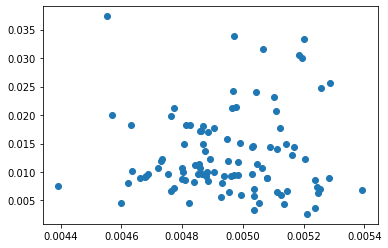

In [147]:
%%time
N = 100
gen = Generator(N, N, maximum = 20)
A = gen.full_random()
b = 20*np.random.rand(N, 1)

x = gaussian_solve(A, b)
nx = vec_l2(x)
nb = vec_l2(b)
errx = []
errb = []
eps = 0.1
for i in range(100):
    db = -eps + 2*eps*np.random.rand(N, 1)
    xn = gaussian_solve(A, b+db)
    dx = xn - x
    errx.append(vec_l2(dx)/nx)
    errb.append(vec_l2(db)/nb)
    
import matplotlib.pyplot as plt

plt.scatter(errb, errx)
plt.plot()

cn = np.mean(np.array(errx) / np.array(errb))
print("Conditional numbers: extimation = {}, real = {}".format(cn, cond_n(A)))

print(mat_l2(A), mat_l2(np.linalg.inv(A)))

# Дополнительные задачи

## *Задача 7* 

В этой задаче требуется найти аналитическое решение и проверить его с 

помощью вычислений на Python. Решить только один пример (на выбор).

Примеры решения подобных задач есть в документе "Визуализация данных" к занятию А1

1.1. Чему равна погрешность в определении действительного корня $x=1$ уравнения $a x^{4}+b x^{3}+d x+e=0$, если $a=1 \pm 10^{-3}, b=1 \pm 10^{-3}$, $d=-1 \pm 10^{-3}, e=-1 \pm 10^{-3}$ ?

1.2. Чему равна погрешность в определении корней уравнения $a x^{3}+b x^{2}=0$, если $a=1 \pm 10^{-3}, b=-4 \pm 10^{-3}$ ?

1.3. С каким числом верных знаков (или относительной погрешностью) должен быть известен свободный член в уравнении $x^{2}-2 x+0.999993751=0$, чтобы корни имели четыре верных знака?

1.4. С каким числом верных знаков (или относительной погрешностью) должен быть известен свободный член в уравнении $x^{2}-4 x+3.999901=0$, чтобы корни имели четыре верных знака?

1.5. Определить оптимальный шаг $h=$ const формулы численного дифференцирования $f^{\prime}(x-h) \approx(f(x)-f(x-h)) / h, \max _{[x-h, x]}\left|f^{\prime \prime}(x)\right| \leq 100$, если абсолютная погрешность при задании $f(x), f(x-h)$ не превосходит $\Delta=0.1$

1.6. Определить оптимальный шаг $h=$ const формулы численного дифференцирования $f^{\prime}(x) \approx(f(x+h)-f(x-h)) / 2 h, \max _{[x-h, x+h]}\left|f^{\prime \prime \prime}(x)\right| \leq 100$, если абсолютная погрешность при задании, $f(x \pm h)$ не превосходит $\Delta=0.1$.

1.7. Определить оптимальный шаг $h=$ const формулы численного дифференцирования $f^{\prime}(x) \approx(3 f(x)-4 f(x-h)+f(x-2 h)) / 2 h$, $\max _{[x-2 h, x]}\left|f^{\prime \prime \prime}(x)\right| \leq 100$, если абсолютная погрешность при задании $f(x)$, $f(x-h), f(x-2 h)$ не превосходит $\Delta=0.1$.

1.8. Пусть приближенное значение первой производной функции $f(x)$ определяется при $h \ll 1$ по формуле
$f^{\prime}(x) \approx(3 f(x)-4 f(x-h)+f(x-2 h)) / 2 h$, а сами значения $f(x), f(x-h), f(x-2 h)$ вычисляются с абсолютной погрешностью $\Delta$.
Какую погрешность можно ожидать при вычислении производной, если $\left|f^{(k)}(x)\right| \leq M_{k}, k=1,2, \ldots ?$

1.9. Пусть задана последовательность чисел $x_{n}, n=0,1,2, \ldots$, причем $x_{n+1}-5 x_{n}=4$, а $x_{0}$ известно с относительной погрешностью $10^{-6} .$ При каких значениях $x_{0}$ относительная погрешность при вычислении $x_{n}$ будет быстро возрастать с ростом $n$ ?

1.10. Пусть задана последовательность чисел $x_{n}, n=0,1,2, \ldots$, причем $5 x_{n+1}-x_{n}=4$, а $x_{0}$ известно с относительной погрешностью $10^{-6} .$ При каких значениях $x_{0}$ относительная погрешность при вычислении $x_{n}$ будет быстро возрастать с ростом $n$ ?

## *Задача 8* 

Выбор метрики (нормы разницы между любыми двумя векторами, или функции расстояния между любой парой точек) очень важен для многих алгоритмов машинного обучения. Рассмотрим на примере задачи кластеризации. 

Кластеризация — это разделение множества входных векторов на группы (кластеры) по степени «схожести» друг с другом.

Кластеризация в Data Mining приобретает ценность тогда, когда она выступает одним из этапов анализа данных, построения законченного аналитического решения. Аналитику часто легче выделить группы схожих объектов, изучить их особенности и построить для каждой группы отдельную модель, чем создавать одну общую модель для всех данных. Таким приемом постоянно пользуются в маркетинге, выделяя группы клиентов, покупателей, товаров и разрабатывая для каждой из них отдельную стратегию.


Евклидова метрика 


— наиболее распространенная. Она является геометрическим расстоянием в многомерном пространстве.


Квадрат евклидовой метрики. 


Иногда может возникнуть желание возвести в квадрат стандартное евклидово расстояние, чтобы придать большие веса более отдаленным друг от друга объектам.


Метрика городских кварталов (манхэттенская). 


Это расстояние является суммой модулей разностей координат. В большинстве случаев эта метрика приводит к таким же результатам, как и для обычного расстояния Евклида. Однако отметим, что для этой меры влияние отдельных больших разностей (выбросов) уменьшается (так как они не возводятся в квадрат).

Расстояние Чебышева. 

Это метрика шахматной доски (Расстоянием Чебышёва между n-мерными числовыми векторами называется максимум модуля разности компонент этих векторов). Это расстояние может оказаться полезным, когда желают определить два объекта как «различные», если они различаются по какой-либо одной координате (каким-либо одним измерением).

Расстояние Чебышёва называют также метрикой Чебышёва, равномерной метрикой, sup-метрикой и бокс-метрикой; также иногда она называется метрикой решётки, метрикой шахматной доски, метрикой хода короля и 8-метрикой.

Степенная метрика. 

Иногда желают прогрессивно увеличить или уменьшить вес, относящийся к размерности, для которой соответствующие объекты сильно отличаются. Это может быть достигнуто с использованием степенного расстояния.


Выбор метрики (критерия схожести) лежит полностью на исследователе. При выборе различных мер результаты кластеризации могут существенно отличаться.

Алгоритм k-means (k-средних)

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

Проблемы алгоритма k-means:
* необходимо заранее знать количество кластеров. Мной было предложено метод определения количества кластеров, который основывался на нахождении кластеров, распределенных по некоему закону (в моем случае все сводилось к нормальному закону). После этого выполнялся классический алгоритм k-means, который давал более точные результаты.
* алгоритм очень чувствителен к выбору начальных центров кластеров. Классический вариант подразумевает случайный выбор класторов, что очень часто являлось источником погрешности. Как вариант решения, необходимо проводить исследования объекта для более точного определения центров начальных кластеров. В моем случае на начальном этапе предлагается принимать в качестве центов самые отдаленные точки кластеров.
* не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному.

Нечеткий алгоритм кластеризации с-means

С последней проблемой k-means успешно справляется алгоритм с-means. Вместо однозначного ответа на вопрос к какому кластеру относится объект, он определяет вероятность того, что объект принадлежит к тому или иному кластеру. Таким образом, утверждение «объект А принадлежит к кластеру 1 с вероятностью 90%, к кластеру 2 — 10% » верно и более удобно.

Остальные проблемы у с-means такие же, как у k-means, но они нивелируются благодаря нечеткости разбиения.

Метод нечеткой кластеризации C-средних имеет ограниченное применение из-за существенного недостатка — невозможность корректного разбиения на кластеры, в случае когда кластеры имеют различную дисперсию по различным размерностям (осям) элементов (например, кластер имеет форму эллипса). Данный недостаток устранен в алгоритмах Mixture models и GMM (Gaussian mixture models). 


Документация методов кластеризации для sklearn есть здесь https://scikit-learn.org/stable/modules/clustering.html#k-means . 


Используя библиотеку scikit-learn, реализуйте Gaussian mixture models и обычный k-means.  Подберите такой набор данных, на котором первый метод справляется хорошо, а второй метод даёт плохие результаты, и продемонстрируйте это. Сделайте это для нескольких разных метрик и сравните результаты между собой.

https://scikit-learn.ru/example/  примеры подобного.

https://neurohive.io/ru/osnovy-data-science/vvedenie-v-scikit-learn/  введение в sklearn. На этом сайте много полезных статей и ссылок на курсы.


